In [1]:
# Importing the necessary libraries that will be used in the project!


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


In [2]:
# Loading the dataset

df = pd.read_csv('Automobile_data.csv')
df.shape

(205, 26)

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df.replace('?', np.nan, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


#### Identify and handle the missing vales

In [5]:
df.isnull()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot: >

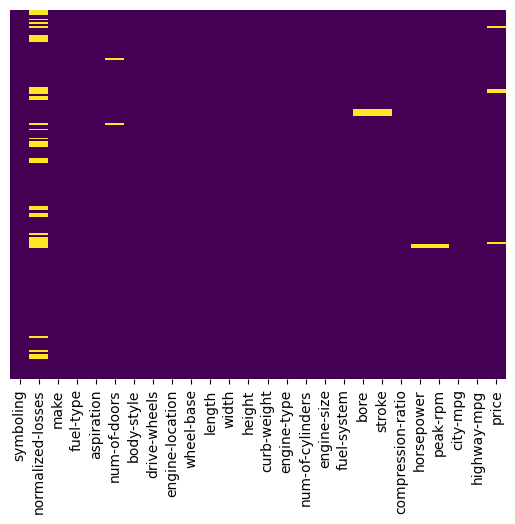

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis',cbar=False)

#### count the missing values in each columns

In [7]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

we have the missing values as such in our data:
1. "normalized-losses"   : 41 missing data
2. "num-of-doors"        : 2 missing data
3. "bore"                : 4 missing data
4. "stroke"              : 4 missing data
5. "horsepower"          : 2 missing data
6. "peak-rpm"            : 2 missing data
7. "price"               : 4 missing data

#### Dealing with missing data
1. Drop Data<br>
    a. drop the whole row <br>
    b. drop the whole column
2. Replace data<br>
    a. replace by the mean <br>
    b. replace by the median <br>
    c. replace it based on other functions

<b>Replace "NaN" in various columns with the average of their columns

In [8]:
columns = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']

for column in columns:
    avg = df[column].astype(float).mean()
    df[column].replace(np.nan, avg, inplace=True)

<b>Replace 'NaN' in various columns with the most frequent class of their columns

In [9]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

We can see that the four doors are the most common type. We can also use the 'idxmax()' method to automatically calculat the common type

In [10]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [11]:
# replace the missing 'num-of-doors' values by the most frequent
df['num-of-doors'].replace(np.nan, df['num-of-doors'].value_counts().idxmax(), inplace=True)

<b>For the Certain column we are droping the entire rows with a missing value

In [12]:
#drop the whole rows with the NaN in price 'column'
df.dropna(subset=['price'], axis=0, inplace=True)
#reset index, because we drop two rows
df.reset_index(drop=True, inplace=True)

<AxesSubplot: >

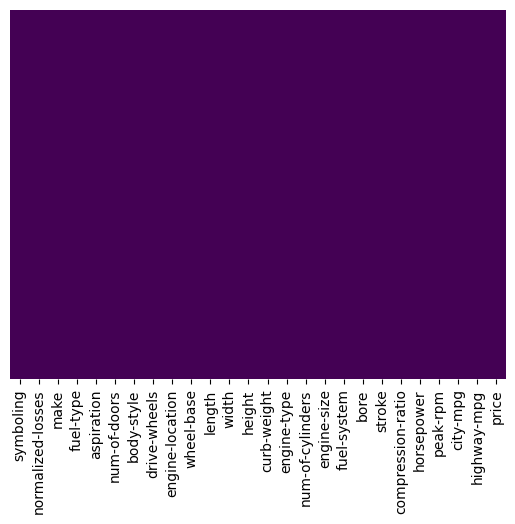

In [13]:
#create a heatmap to show the missing values still remaining in the data
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis', cbar=False)

In [14]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [15]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [16]:
df[['bore', 'stroke', 'price', 'peak-rpm']] = df[['bore', 'stroke', 'price', 'peak-rpm']].astype('float')
df[['normalized-losses']] = df[['normalized-losses']].astype('int')


<b> Listing the columns after the conversion

In [17]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<b>2. Data Standardization 

In [18]:
# transform mpg to l/100km by mathematical operation(235 divided by mpg)

df['city-L/100km'] = round(235/df['city-mpg'],2)
df['highway-L/100km'] = round(235/df['highway-mpg'],2)
df[['city-L/100km', 'city-mpg', 'highway-L/100km', 'highway-mpg']].head()

,city-L/100km,city-mpg,highway-L/100km,highway-mpg
0,11.19,21,8.70,27
1,11.19,21,8.70,27
2,12.37,19,9.04,26
3,9.79,24,7.83,30
4,13.06,18,10.68,22


<b> 3. Data Normalization 

In [19]:
#replace original value by original value/maximum value

df[['length', 'width', 'height']] = df[['length', 'width', 'height']]/df[['length', 'width', 'height']].max()
df[['length', 'width', 'height']].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


#### 4.  Binning 
Convert data to correct format

In [20]:
df['horsepower'] = df['horsepower'].astype(float, copy=True)

We would like our bins of equal size bandwidth


In [21]:
binwidth = (max(df['horsepower'])-min(df['horsepower']))/4
binwidth

53.5

Building an  bin array with a maximum value, with bandwidth calculated above. The bins will be values used to determine when one bin ends and another begins.

In [22]:
bins = np.arange(min(df['horsepower']), max(df['horsepower']), binwidth)
bins

array([ 48. , 101.5, 155. , 208.5])

we set group names:

In [23]:
group_names = ['Low', 'Medium', 'High']

Applying the function 'cut' to determine what value each of 'df[horsepower]' value belongs to.


In [24]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels= group_names, include_lowest=True)
df[['horsepower', 'horsepower-binned']].head(10)

,horsepower,horsepower-binned
0,111.0,Medium
1,111.0,Medium
2,154.0,Medium
3,102.0,Medium
4,115.0,Medium
5,110.0,Medium
6,110.0,Medium
7,110.0,Medium
8,140.0,Medium
9,101.0,Low


<b>Bins Visualization

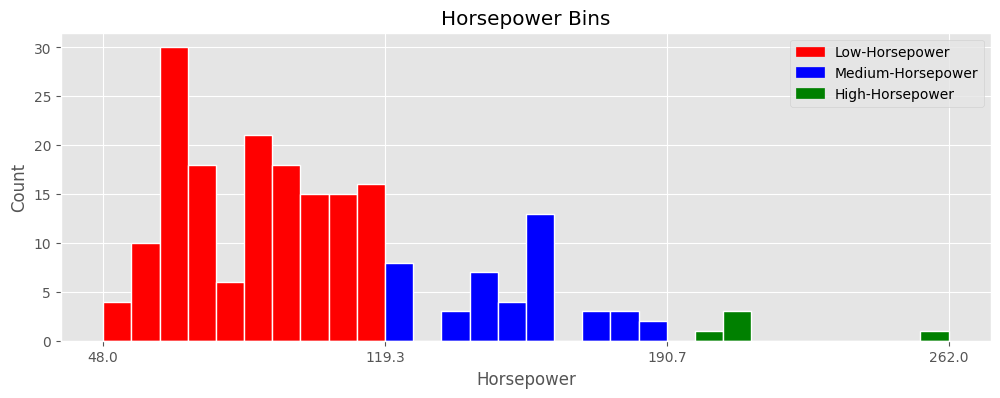

In [25]:
mpl.style.use(['ggplot'])

total_categories = 3

#Let's get the x_tick values
count, bin_edges = np.histogram(df['horsepower'], 3)

fig, ax = plt.subplots(figsize=(12,4))
N, bins, patches = ax.hist(df['horsepower'], bins= total_categories*10, edgecolor = 'white', linewidth=1)
for i in range(0, 10):
    patches[i].set_facecolor('r')
for i in range(10, 20):
    patches[i].set_facecolor('b')
for i in range(20, 30):
    patches[i].set_facecolor('g')
    
ax.set_xticks(bin_edges)

ax.set_title('Horsepower Bins')
ax.set_ylabel('Count')
ax.set_xlabel('Horsepower')


red_patch = mpatches.Patch(color='red', label= "Low-Horsepower")
blue_patch = mpatches.Patch(color='blue', label= "Medium-Horsepower")
green_patch = mpatches.Patch(color='green', label= 'High-Horsepower')

plt.legend(handles=[red_patch, blue_patch, green_patch])

plt.show()

<b>5. Creating indicator Variable(or dummy variable)

In [26]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'highway-L/100km',
       'horsepower-binned'],
      dtype='object')

Get indicator variables and assign it to data frame 'dummy_variable_1'

In [27]:
df['fuel-type']

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
196       gas
197       gas
198       gas
199    diesel
200       gas
Name: fuel-type, Length: 201, dtype: object

In [28]:
dummy_variable_1 = pd.get_dummies(df['fuel-type'])
dummy_variable_1

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
196,0,1
197,0,1
198,0,1
199,1,0


In [29]:
dummy_variable_1 = pd.get_dummies(df['fuel-type'])
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'},inplace=True)
# df= df.drop('fuel-type', axis=1, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [30]:
#merge dataframe 'df' and 'dummy_variable_1'
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original 'fuel-type' from 'df'

df.drop('fuel-type', axis=1, inplace=True)

In [31]:
dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo':'aspiration-turbo'}, inplace=True)
df = pd.concat([df, dummy_variable_2], axis=1)
df.drop('aspiration', axis=1, inplace=True)

In [32]:
df.to_csv('clean_df2.csv')

### <center> Exploratory Data Analysis

#### We will use cleansed data frame generated after data wrangling
When visualizing individual variables. It is important to first understand what type of variable we have


In [33]:
df.dtypes

symboling               int64
normalized-losses       int32
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
city-L/100km          float64
highway-L/100km       float64
horsepower-binned    category
fuel-type-diesel        uint8
fuel-type-gas           uint8
aspiration-std          uint8
aspiration-turbo        uint8
dtype: object

#### Finding the Correlation between various columns of the dataFrame

In [34]:
df.corr()

C:\Users\Olayinka Akerekan\AppData\Local\Temp\ipykernel_12844\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.279740,-0.035527,0.036233,-0.082391,0.066183,-0.029756,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.239543,-0.225016,-0.181877,0.133999,0.238710,0.181024,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,-0.360305,-0.470606,-0.543304,0.584642,0.476255,0.577655,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,-0.285970,-0.665192,-0.698142,0.690628,0.657456,0.707121,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,-0.245800,-0.633531,-0.680635,0.751265,0.673461,0.736868,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.309974,-0.049800,-0.104812,0.135486,0.003810,0.084366,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,-0.279361,-0.749543,-0.794889,0.834415,0.785391,0.836978,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,-0.256733,-0.650546,-0.679571,0.872335,0.745120,0.783518,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,-0.267392,-0.582027,-0.591309,0.543155,0.554656,0.559095,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,-0.063561,-0.033956,-0.034636,0.082269,0.036130,0.047118,0.241064,-0.241064,-0.218233,0.218233


The possibe predictor are 'engine-size', 'highway-mpg', 'peak-rpm' and 'stroke'

In [35]:
df[['price', 'engine-size', 'highway-mpg', 'peak-rpm', 'stroke']].corr()['price']

price          1.000000
engine-size    0.872335
highway-mpg   -0.704692
peak-rpm      -0.101616
stroke         0.082269
Name: price, dtype: float64

From the above we can deduce that engine-size have a strong linear relationship. highway-mpg has a strong negative linear relationship; peak-rpm and stroke both has a weak linear relationship with price. 

Visualizing this linear relationship

Text(0.5, 1.0, 'price vs engine-size: Weak Positive')

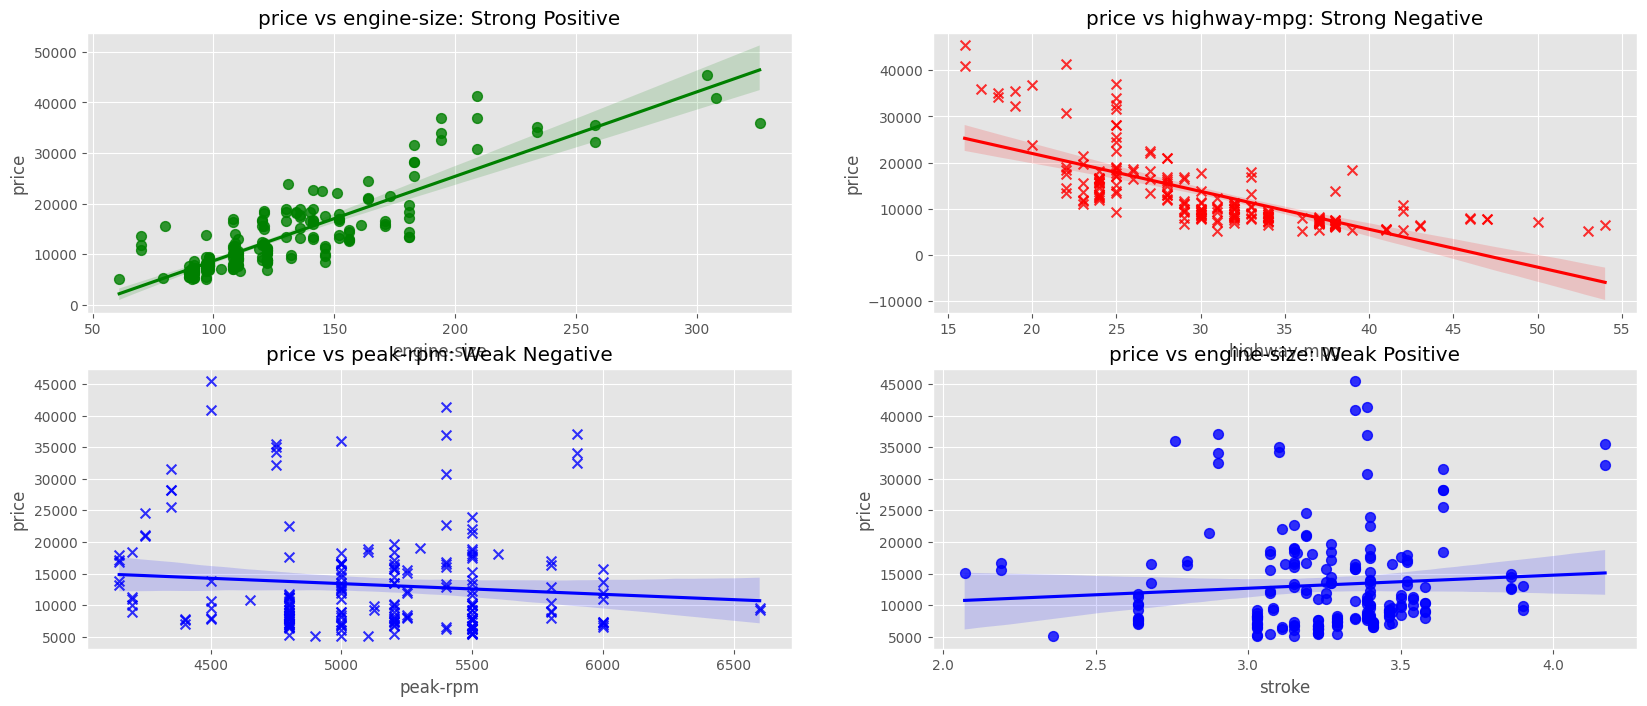

In [36]:
fig = plt.figure(figsize=(20,8)) #create figure

ax0 = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,4)


# sns.set(font_scaler= 1.5)

#subplot 1;
sns.regplot(data= df, x= 'engine-size', y = 'price', color='green', marker='o', scatter_kws={'s':50}, ax= ax0)
ax0.set_title('price vs engine-size: Strong Positive')
# Subplot 2;
sns.regplot(data= df, x= 'highway-mpg', y = 'price', marker='x', color='red', scatter_kws={'s':50}, ax= ax1)
ax1.set_title('price vs highway-mpg: Strong Negative')
# Subplot 3;
sns.regplot(data= df, x= 'peak-rpm', y = 'price', marker='x', color = 'blue',scatter_kws={'s':50}, ax= ax2)
ax2.set_title('price vs peak-rpm: Weak Negative')
# Subplot 4;
sns.regplot(data= df, x= 'stroke', y = 'price', marker='o', color= 'blue', scatter_kws={'s':50}, ax= ax3)
ax3.set_title('price vs engine-size: Weak Positive')


#### Looking for categorical variable that can be used to predict price

<AxesSubplot: xlabel='body-style', ylabel='price'>

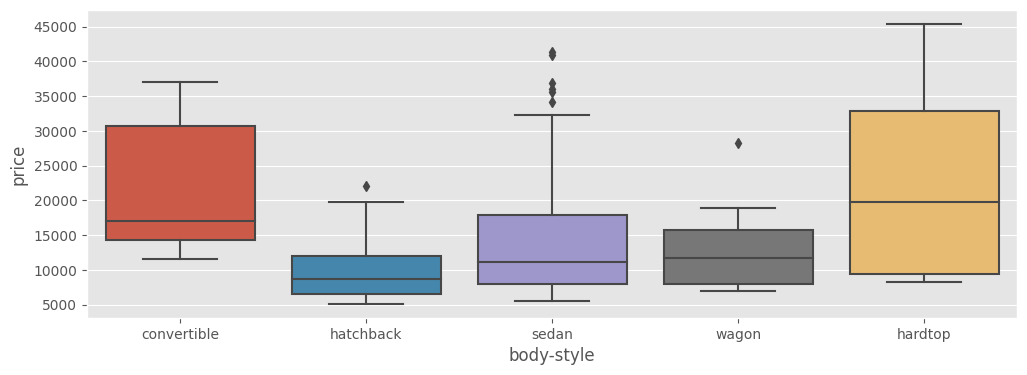

In [37]:
plt.figure(figsize=(12,4))
sns.boxplot(x ='body-style', y = 'price', data=df)

From this boxplot, we could see that the body-style is not a good predictor of price of the car. Showing a continuous overlap

<AxesSubplot: xlabel='engine-location', ylabel='price'>

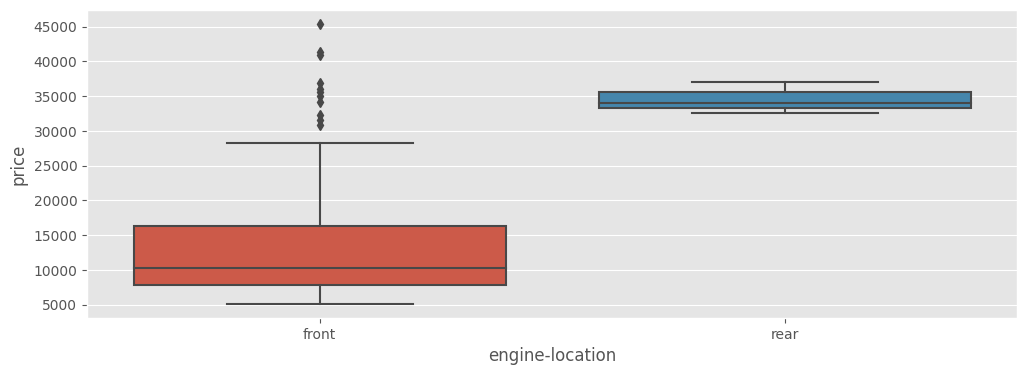

In [38]:
plt.figure(figsize=(12,4))
sns.boxplot(x ='engine-location', y = 'price', data=df)

shows a clear variation between cars with engines located at the front and the rear

<AxesSubplot: xlabel='drive-wheels', ylabel='price'>

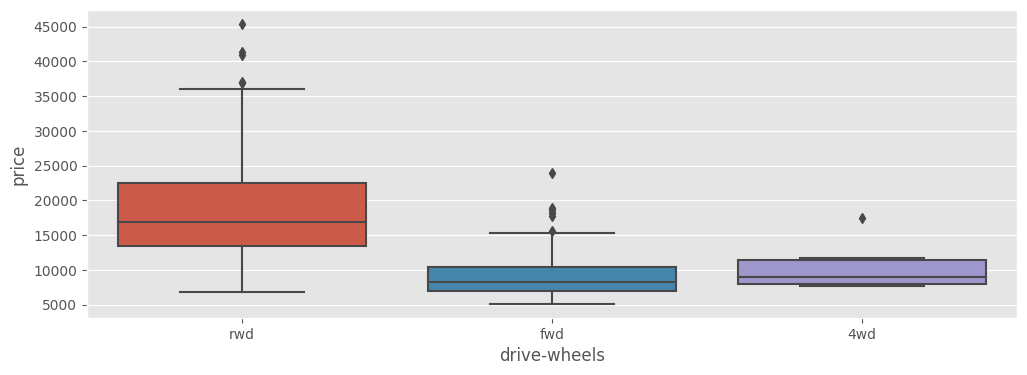

In [39]:
# drive wheels

plt.figure(figsize=(12,4))
sns.boxplot(x ='drive-wheels', y = 'price', data=df)

There is a distribution of price for various categories of cars. This could be a good predictor of cars prices

### Descriptive Statistics

In [40]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,5117.665368,25.179104,30.686567,13207.129353,9.943582,8.043433,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,478.113805,6.423220,6.815150,7947.066342,2.535594,1.841293,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,4150.000000,13.000000,16.000000,5118.000000,4.800000,4.350000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,4800.000000,19.000000,25.000000,7775.000000,7.830000,6.910000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,5125.369458,24.000000,30.000000,10295.000000,9.790000,7.830000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,5500.000000,30.000000,34.000000,16500.000000,12.370000,9.400000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,6600.000000,49.000000,54.000000,45400.000000,18.080000,14.690000,1.000000,1.000000,1.000000,1.000000


The default setting  of 'describe' skips variables of type object. We can apply describe to them as follows

In [41]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


In [42]:
# Understanding the various amount of each drive-wheels that we have
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


save result to a dataFrame 'drive_wheels_counts' and rename the column 'drive-wheels' to value_counts;

In [43]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive_wheels'

drive_wheels_counts

,value_counts
drive_wheels,
fwd,118
rwd,75
4wd,8


In [44]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location':'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value_counts
engine-location,
front,198
rear,3


The engine-location cannot be a good predictor of price, as we only have three sample of cars we rear engines

### Groups Analysis

In [45]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [46]:
df_group = df[['drive-wheels', 'price']]
df_group_result = df_group.groupby(['drive-wheels'], as_index=False).mean()
df_group_result

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


From our data, it seems real wheel vehicles are on the average most expensive, while the 4wd and front-wheel are approximately same price

We can also groupby multiple variable, like the drive-wheels, and body-style.

In [47]:
df_group = df[['drive-wheels','body-style' , 'price']]
df_group_result = df_group.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
df_group_result

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Make it into a pivot table to visualize well enough


In [48]:
grouped_pivot = df_group_result.pivot(index='drive-wheels', columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

fill missing values with 0 in the above pivot table

In [49]:
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Plot heatmap for the table


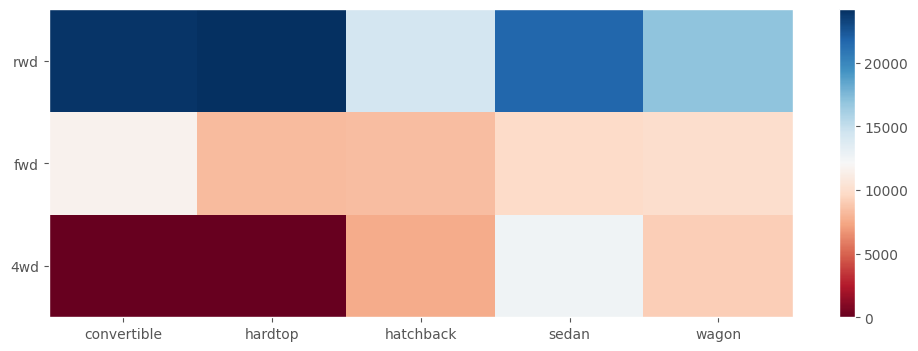

In [50]:
fig, ax= plt.subplots(figsize=(12,4))

im = ax.pcolor(grouped_pivot, cmap='RdBu')
# Label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0])+0.5, minor=False)

# insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
# rotate label is too long
plt.xticks(rotation= 0)
fig.colorbar(im)

plt.show()

#### Correlation and Causation Analysis

In [51]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print('The Pearson Coefficient for wheel-base vs price is', pearson_coef, 'with a P-value of P=', p_value)
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print('The Pearson Coefficient for horsepower vs price is', pearson_coef, 'with a P-value of P=', p_value)
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print('The Pearson Coefficient for length vs price is', pearson_coef, 'with a P-value of P=', p_value)
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print('The Pearson Coefficient for width vs price is', pearson_coef, 'with a P-value of P=', p_value)
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print('The Pearson Coefficient for curb-weight vs price is', pearson_coef, 'with a P-value of P=', p_value)
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print('The Pearson Coefficient for engine-size vs price is', pearson_coef, 'with a P-value of P=', p_value)
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print('The Pearson Coefficient for bore vs price is', pearson_coef, 'with a P-value of P=', p_value)
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print('The Pearson Coefficient for city-mpg vs price is', pearson_coef, 'with a P-value of P=', p_value)
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print('The Pearson Coefficient for highway-mpg vs price is', pearson_coef, 'with a P-value of P=', p_value)

The Pearson Coefficient for wheel-base vs price is 0.5846418222655081 with a P-value of P= 8.076488270732989e-20
The Pearson Coefficient for horsepower vs price is 0.809574567003656 with a P-value of P= 6.369057428259557e-48
The Pearson Coefficient for length vs price is 0.6906283804483642 with a P-value of P= 8.016477466158759e-30
The Pearson Coefficient for width vs price is 0.7512653440522672 with a P-value of P= 9.20033551048217e-38
The Pearson Coefficient for curb-weight vs price is 0.8344145257702844 with a P-value of P= 2.189577238893878e-53
The Pearson Coefficient for engine-size vs price is 0.8723351674455182 with a P-value of P= 9.265491622200232e-64
The Pearson Coefficient for bore vs price is 0.5431553832626603 with a P-value of P= 8.04918948393526e-17
The Pearson Coefficient for city-mpg vs price is -0.6865710067844677 with a P-value of P= 2.321132065567674e-29
The Pearson Coefficient for highway-mpg vs price is -0.7046922650589529 with a P-value of P= 1.7495471144477352e-

#### Conclusions
All above continuous features are having positive relationship with price making them a good predictor of price, The details are given below <br/>
Since the p-value is <0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship is not extremely strong (0.585)
<br>
Since the p-value is <0.001, the correlation between horsepower and price is statistically significant, although the linear relationship is quite strong(0.809)
<br/>
Since the p-value is <0.001, the correlation between length and price is statistically significant, although the linear relationship is moderately strong(0.691)
<br/>
Since the p-value is <0.001, the correlation between width and price is statistically significant, although the linear relationship is quite strong(0.751)
<br/>
Since the p-value is <0.001, the correlation between curb-weight and price is statistically significant, although the linear relationship is quite strong(0.834)
<br/>
Since the p-value is <0.001, the correlation between engine-size and price is statistically significant, although the linear relationship is quite strong(0.872)
<br/>
Since the p-value is <0.001, the correlation between bore and price is statistically significant, although the linear relationship is strong moderately (0.686)
<br/>
Since the p-value is <0.001, the correlation between city-mpg and price is statistically significant, although the linear relationship is moderately strong and negative(0.687)
<br/>
Since the p-value is <0.001, the correlation between highway-mpg and price is statistically significant, although the linear relationship is moderately strong and negative(0.705)


### ANOVA

The Analysis of Variance(ANOVA) is a statistical methos used to test whether there are significant differences between the means of two or more groups.

ANOVA returns two parameters:

<b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-testscore. A larger score means there is a larger difference between the means.
    
<b>P-value</b>: P-value tells us the statistical significance of our calculated score value. 
    

if our price variable is strongly correlated with the variable we are analyzing, except ANOVA to return a sizable F-test score and a small p-value 

#### Anova on the drive-wheel and price

In [52]:
df_group = df[['drive-wheels', 'price']]
groups = df_group[['drive-wheels', 'price']].groupby(['drive-wheels'])

groups.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


We can obtain the values of the method group uding th method 'get_group'

In [53]:
groups.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [54]:
#ANOVA
f_val, p_val = stats.f_oneway(groups.get_group('fwd')['price'], 
                              groups.get_group('rwd')['price'], 
                              groups.get_group('4wd')['price'])
print("ANOVA result F=", f_val, ", P=", p_val)

ANOVA result F= 67.95406500780399 , P= 3.3945443577149576e-23


This is a great result, with large F score showing the important of Drive wheels for price prediction. The large F test score suggests more that the mean price value for these three group varies a lot. Consequently, showing a strong correlation of these three group with price. But it doesnt mean all the three group are highly correlated with price


In [55]:
f_val, p_val = stats.f_oneway(groups.get_group('fwd')['price'], 
                              groups.get_group('rwd')['price'])
print("ANOVA result F=", f_val, ", P=", p_val)
f_val, p_val = stats.f_oneway(groups.get_group('rwd')['price'], 
                              groups.get_group('4wd')['price'])
print("ANOVA result F=", f_val, ", P=", p_val)
f_val, p_val = stats.f_oneway(groups.get_group('fwd')['price'],  
                              groups.get_group('4wd')['price'])
print("ANOVA result F=", f_val, ", P=", p_val)

ANOVA result F= 130.5533160959111 , P= 2.2355306355677366e-23
ANOVA result F= 8.580681368924756 , P= 0.004411492211225367
ANOVA result F= 0.6654657502523033 , P= 0.4162011669784502


We can now see the seperate result.

### Machine Learning Model using Random Forest Regressors and Linear Regression.

In [56]:
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg',
            'bore','wheel-base', 'city-mpg', 'length', 'width']]
y = df['price']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print('number of test samples:', X_test.shape[0])
print('number of training samples:', X_train.shape[0])


number of test samples: 41
number of training samples: 160


### Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

#### Multiple Linear Regression Evaluation

In [60]:
print('The R_squared value for Multiple Linear Regression Model is: ', lm.score(X_test,y_test))

The R_squared value for Multiple Linear Regression Model is:  0.7493314050168784


We can say that 75% of the variation in price is explained by this model 

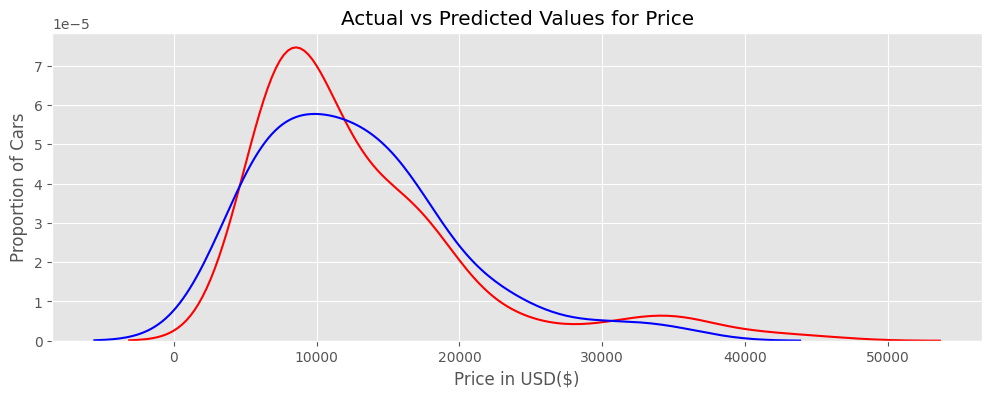

In [61]:
predictions = lm.predict(X_test)
plt.figure(figsize=(12,4))

sns.kdeplot(y, color='r', legend = True, label = "Actual Value")
sns.kdeplot(predictions, color='b', label = "predicted value")

plt.title('Actual vs Predicted Values for Price')
plt.xlabel('Price in USD($)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see the predicted value is close to our actual price

### Polynomial Linear Regression

Data Pipelines simplify the steps of processsing the data. We can use the module Pipeline to create a pipeline. 

In [62]:
Input= [('scale', StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

We input the list as an argument to the pipeline construtor

In [63]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

We can normalize the data, perform a transform and fit the model simultaneously.

In [64]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

####  Polynomial Linear Regression Evaluation

In [65]:
print('The R_squared value for Polynomial Linear Regression Model is: ', pipe.score(X_test,y_test))

The R_squared value for Polynomial Linear Regression Model is:  0.8634119656126606



We can say that 86% of the variation of the price is explained by this polynomial regression model.

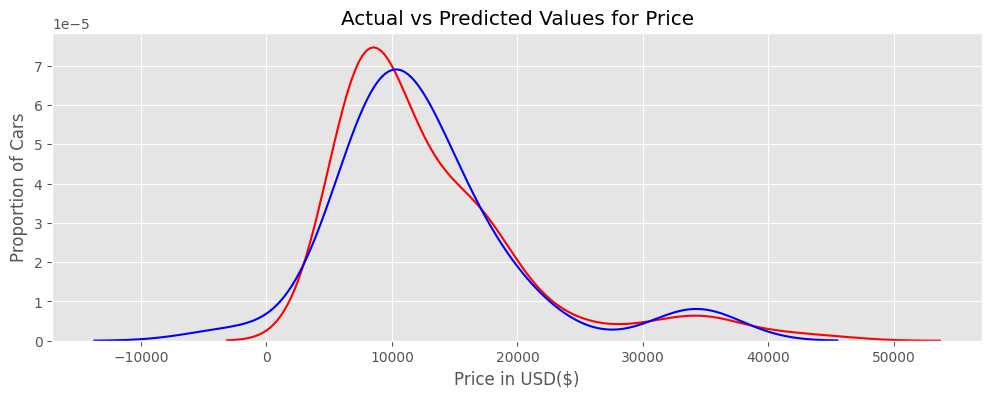

In [66]:
predictions = pipe.predict(X_test)

plt.figure(figsize=(12,4))

sns.kdeplot(y, color='r', legend = True, label = "Actual Value")
sns.kdeplot(predictions, color='b', label = "predicted value")

plt.title('Actual vs Predicted Values for Price')
plt.xlabel('Price in USD($)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

As it can be seen that for Polynomial Linear Regression, the fitted values are much more closer to the actual values than Multiple Linear Regression.

#### Random Forest Regression

Random Forest is non linear regression based on decision trees.

In [67]:
Rf = RandomForestRegressor()
Rf.fit(X_train, y_train)

RandomForestRegressor()

##### Random Forest Regression Evaluation

In [68]:
print('The R_squared value for Random Forest Regression Model is: ', Rf.score(X_test,y_test))

The R_squared value for Random Forest Regression Model is:  0.9549819742084186


We can say that 95% of the variation of the price is explained by this random forest Regressors.


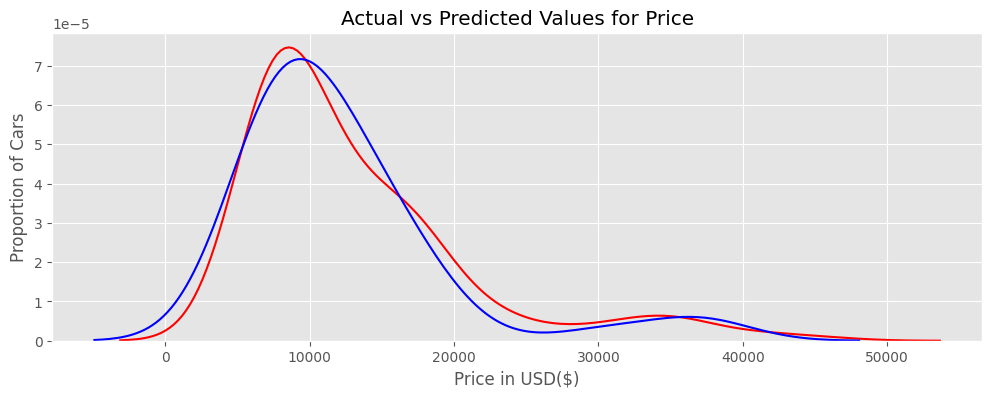

In [69]:
predictions = Rf.predict(X_test)

plt.figure(figsize=(12,4))

sns.kdeplot(y, color='r', legend = True, label = "Actual Value")
sns.kdeplot(predictions, color='b', label = "predicted value")

plt.title('Actual vs Predicted Values for Price')
plt.xlabel('Price in USD($)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

### Hyper Parameter Tuning

As can be seen, the best performing model with approximately 0.95 r-squared value is Random Forest. Now to refine it and make it perform even better. its hyper parameters tuning is done in grid search manner.<br> <br/>
Creating Grid of Hyper Parameter Values. 

In [70]:
# Number of trees in random forest
n_estimator = [int(x) for x in np.linspace(start=100, stop=2000, num=10)]

#Number of features to consider at every split
#Number of level in tree
max_depth = [10,20,40,80,100]
max_depth.append(None)
#minimum number of samples required to split a mode
min_samples_split = [2,8]
#minimum number of smaple required in each leaf node
min_samples_leaf = [1,4]

#Method of selecting samples for traning each tree
bootstrap = [True]

#Create a grid
distributions = {'n_estimators': n_estimator,
       'max_depth': max_depth,
       'min_samples_split': min_samples_split,
       'min_samples_leaf': min_samples_leaf,
       'bootstrap': bootstrap
       }

Rf_random = RandomizedSearchCV(estimator=Rf, param_distributions=distributions, cv=2, n_jobs=-1)

In [71]:
Rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 20, 40, 80, 100,
                                                      None],
                                        'min_samples_leaf': [1, 4],
                                        'min_samples_split': [2, 8],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]})

In [72]:
Best_Rf = Rf_random.best_estimator_
Best_Rf

RandomForestRegressor(max_depth=40, n_estimators=944)

In [73]:
predictions = Best_Rf.predict(X_test)

In [74]:
print('The R_squared value for Best Random Forest Regression Model is: ', Best_Rf.score(X_test,y_test))

The R_squared value for Best Random Forest Regression Model is:  0.9536357287052123


We can say that 95% of the variation of the price is explained by this Random Forest Regressor.

In [ ]:
plt.figure(figsize=(12,4))

sns.kdeplot(y, color='r', legend = True, label = "Actual Value")
sns.kdeplot(predictions, color='b', label = "predicted value")

plt.title('Actual vs Predicted Values for Price')
plt.xlabel('Price in USD($)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()